# NO$_x$ gas phase mixing ratio monitoring

## Library importation

In [52]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as mdates

## Loading file: WARNING - assign the right path

In [53]:
## note all the experiments measurements were brought back to the same date to be able to superimpose the curves
all_nox = pd.read_csv('/Users/albane/Desktop/Paper 2/version co auteurs/REVIEW-JGR/files for response/2021JD035062_repository/Gas-phase-mixing-ratio/Pnox-NOx-JNO3-All.csv', sep=';')
all_nox['date and time'] = pd.to_datetime(all_nox.pop('date and time'), dayfirst=True)
all_nox=all_nox.set_index('date and time')

### Hourly resampling

In [54]:
all_nox=all_nox.resample('1H', loffset='30min').mean()

### Averaging UV data

In [55]:
all_nox['UV_Rad'] = all_nox[['UV_1', 'UV_2', 'UV_3', 'UV_4', 'UV_5','UV_6', 'UV_7']].mean(axis=1)

### Data reorganization for a better visualization

In [56]:
all_nox['NOx_1']=all_nox['NOx_1']+abs(all_nox['NOx_1'].min())
all_nox['NOx_2']=all_nox['NOx_2']+abs(all_nox['NOx_2'].min())
all_nox['NOx_3']=all_nox['NOx_3']+abs(all_nox['NOx_3'].min())
all_nox['NOx_4']=all_nox['NOx_4']+abs(all_nox['NOx_4'].min())
all_nox['NOx_5']=(all_nox['NOx_5']+abs(all_nox['NOx_5'].min()))/10
all_nox['NOx_6']=all_nox['NOx_6']+abs(all_nox['NOx_6'].min())
all_nox['NOx_7']=all_nox['NOx_7']+abs(all_nox['NOx_7'].min())

## Figure 6

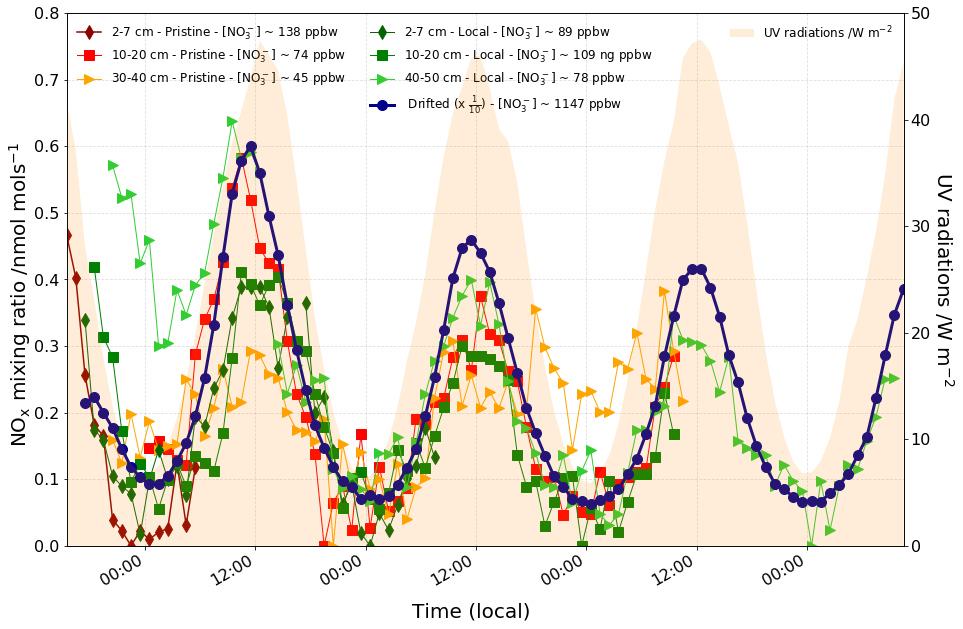

In [57]:
fig,ax = plt.subplots(figsize=(15,10), sharex=True, gridspec_kw={'hspace': 0})
fig.text(0.5, 0.1, 'Time (local)', ha='center', size=20)
fig.text(0.07, 0.55, 'NO$\mathrm{_x}$ mixing ratio /nmol mols$^{-1}$', va='center', rotation='vertical', size=20)

ax.plot(all_nox.index, all_nox['NOx_4'], color='darkred', marker='d', markersize=10, linestyle='-', linewidth=1.5,  label='2-7 cm - Pristine - [NO$_3^-$] ~ 138 ppbw')
ax.plot(all_nox.index, all_nox['NOx_7'], color='red', marker='s', markersize=10, linestyle='-', linewidth=1,  label='10-20 cm - Pristine - [NO$_3^-$] ~ 74 ppbw')
ax.plot(all_nox.index, all_nox['NOx_2'], color='orange', marker='>', markersize=10, linestyle='-', linewidth=1,  label='30-40 cm - Pristine - [NO$_3^-$] ~ 45 ppbw')
ax.plot(all_nox.index, all_nox['NOx_5'], color='none', marker='o', markersize=10, linestyle='-', linewidth=3, label=' ')## To organize legend
ax.plot(all_nox.index, all_nox['NOx_3'], color='darkgreen', marker='d', markersize=10, linestyle='-', linewidth=1,  label='2-7 cm - Local - [NO$_3^-$] ~ 89 ppbw')
ax.plot(all_nox.index, all_nox['NOx_6'], color='green', marker='s', markersize=10, linestyle='-', linewidth=1,  label='10-20 cm - Local - [NO$_3^-$] ~ 109 ng ppbw')
ax.plot(all_nox.index, all_nox['NOx_1'], color='limegreen', marker='>',markersize=10,  linestyle='-', linewidth=1,  label='40-50 cm - Local - [NO$_3^-$] ~ 78 ppbw')
ax.plot(all_nox.index, all_nox['NOx_5'], color='darkblue', marker='o', markersize=10, linestyle='-', linewidth=3, label=r' Drifted (x $\frac{1}{10}$) - [NO$_3^-$] ~ 1147 ppbw',zorder=+10)

ax2 = ax.twinx()
ax2.fill_between(all_nox.index, all_nox['UV_Rad'], facecolor='darkorange', interpolate=True, alpha=.15, label='UV radiations /W m$^{-2}$')
ax2.set_ylabel('UV radiations /W m$^{-2}$', size=20, rotation=270, labelpad=25)

plt.rc('xtick', labelsize=16) 
plt.rc('ytick', labelsize=16)
plt.margins(x=0)
fig.align_ylabels()
fig.autofmt_xdate()
fig.subplots_adjust(top=0.94)
ax.xaxis.set_major_formatter(mdates.DateFormatter("%H:%M"))
ax.set_ylim(0,0.80)
ax2.set_ylim(0,50)

ax.legend(fancybox=True, framealpha=0.,loc='upper left', ncol=2, fontsize=12)
ax2.legend(fancybox=True, framealpha=0.,loc='upper right', ncol=1, fontsize=12)

ax.grid(axis='both', which='both', alpha=.4,linestyle='--')
